In [2]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
from Bio import AlignIO
import beak.alignments.utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'beak'

First, let's load an alignment

In [ ]:
filepath = '/Users/micaholivas/Library/CloudStorage/GoogleDrive-mbolivas@stanford.edu/.shortcut-targets-by-id/1-794qIs0qT1G5m39ZBPHOeCKSxeH3Bi8/Designed_AcyPs_manuscript/Data/alignments/AcyP_orthologs/output/aligned_orthologs.fasta'
aln = AlignIO.read(filepath, "fasta")

Now we'll "ungap" the alignment by removing significantly gapped positions

In [ ]:
aln = beak.alignments.utils.ungap_aln(aln)
aln

<<class 'Bio.Align.MultipleSeqAlignment'> instance (24897 records of length 86) at 1945c7e80>

Great! Let's see what the consensus sequence is from this alignment

In [ ]:
consensus = beak.alignments.utils.get_consensus(aln)
print(consensus)

--MVRVHAIVSGRVQGVGFRYFTRREAL-LGLTGWVRNLPD-VEVVAEGPE-AVEALL-WL--GPP-ARV--EVEW-----FEIR-


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

Let's make a position-specific scoring matrix

In [ ]:
pssm = beak.alignments.utils.alignment_to_pssm(aln, freq=True)

pssm

,A,R,N,D,C,Q,E,G,H,I,...,K,M,F,P,S,T,W,Y,V,-
0,0.035908,0.011768,0.027272,0.040929,0.000522,0.012572,0.059445,0.026469,0.007551,0.004499,...,0.019038,0.212034,0.001285,0.023858,0.068321,0.036591,0.000442,0.000361,0.008636,0.394907
1,0.070249,0.030486,0.032052,0.066434,0.000683,0.019159,0.095594,0.044985,0.012773,0.004539,...,0.033217,0.116400,0.001607,0.034100,0.087079,0.045989,0.000080,0.000763,0.012652,0.285697
2,0.026429,0.074868,0.045307,0.052697,0.002330,0.042897,0.043459,0.006467,0.013054,0.055589,...,0.100414,0.249669,0.005623,0.025545,0.026630,0.054665,0.001366,0.007029,0.039483,0.050207
3,0.061654,0.071615,0.006868,0.005623,0.008073,0.058842,0.066233,0.004097,0.007149,0.129132,...,0.167771,0.033739,0.008636,0.010564,0.027634,0.050970,0.000964,0.007993,0.218058,0.022212
4,0.130216,0.407077,0.010001,0.000241,0.098004,0.028999,0.009158,0.014701,0.035587,0.013817,...,0.043620,0.001968,0.001125,0.000402,0.074788,0.089489,0.001285,0.003133,0.011126,0.020404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.001285,0.000602,0.000281,0.000562,0.000201,0.000120,0.000281,0.000522,0.000281,0.000683,...,0.000402,0.000763,0.889103,0.000321,0.000723,0.000161,0.000442,0.003294,0.002008,0.094349
82,0.059646,0.132506,0.021971,0.056714,0.001205,0.059525,0.219826,0.031570,0.034502,0.018637,...,0.061694,0.003454,0.007270,0.000482,0.129494,0.060811,0.001084,0.008716,0.060690,0.020002
83,0.010162,0.014299,0.000161,0.000361,0.002852,0.043138,0.014098,0.000602,0.000643,0.479978,...,0.010001,0.012170,0.002530,0.001647,0.004217,0.054625,0.001004,0.002008,0.238141,0.096959
84,0.040688,0.331847,0.008234,0.006025,0.003253,0.019400,0.077278,0.030887,0.018757,0.080733,...,0.076154,0.007993,0.003655,0.000723,0.018838,0.053942,0.005061,0.014781,0.065189,0.025224


Now, for a query sequence, get the frequency of each residue at each aligned position

In [ ]:
my_seq = "MSTAQSLKSVDYEVFGRVQGVCFRMYTEDEARKIGVVGWVKNTSKGTVTGQVQGPEDKVNSMKSWLSKVGSPSSRIDRTNFSNEKTISKLEYSNFSIRY"
arr = beak.alignments.utils.single_sequence_aln_frequencies(my_seq, pssm, check_positions=True)
print(arr)

[[3.94907017e-01 2.85697072e-01 5.02068522e-02 2.22115114e-02
  2.04040647e-02 1.16078242e-02 7.99293088e-03 2.21713459e-01
  1.34835522e-01 6.03526529e-01 1.29413182e-01 0.00000000e+00
  2.85174921e-02 1.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 4.01654818e-05 0.00000000e+00 0.00000000e+00
  1.98819135e-02 2.06852231e-02 9.19789533e-03 2.77141824e-01
  3.90810138e-02 5.14118167e-03 6.02482227e-04 1.64959634e-01
  6.74780094e-02 4.45836848e-03 1.37365948e-02 5.21026630e-01
  8.61549584e-02 0.00000000e+00 4.09687914e-03 0.00000000e+00
  2.73928586e-02 0.00000000e+00 0.00000000e+00 1.08446801e-02
  1.44595734e-03 5.34200908e-03 6.02482227e-04 2.25328353e-02
  0.00000000e+00 9.23806081e-03 8.03309636e-05 2.16491947e-02
  3.61489336e-04 4.29770655e-03 2.18098566e-02 1.20255452e-01
  5.41832349e-02 5.62316745e-03 4.01654818e-04 1.53954292e-01
  5.22151263e-04 2.65895489e-02 1.05635217e-02 6.67951962e-02
  6.22966622e-02 6.42647709e-03 5.42234004e-03 4.22179379e-01
  1.2049

Get the conservation of each position

In [ ]:
import matplotlib.pyplot as plt

conservation = beak.alignments.utils.conservation_from_aln(aln)
conservation = beak.alignments.utils.single_sequence_aln_frequencies(my_seq, pssm, check_positions=False)

AttributeError: module 'beak.alignments.utils' has no attribute 'conservation_from_aln'

NameError: name 'conservation' is not defined

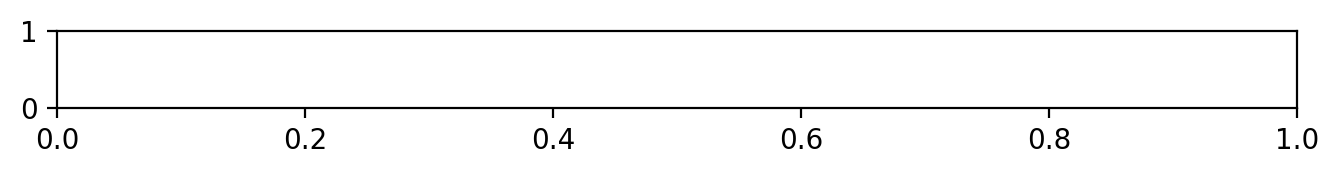

In [ ]:
fig, axs = plt.subplots(figsize=(8,0.5), dpi=200)
# plt.imshow(conservation.reshape(86,1).T, aspect='auto')
plt.imshow(conservation.reshape(99,1).T, aspect='auto')
plt.colorbar(shrink=1, aspect=2)
plt.yticks([])
plt.xlabel('Alignment Position')
axs.xaxis.tick_top()
axs.xaxis.set_label_position('top')
plt.tick_params(axis='x', which='major', pad=-0.5)
plt.show()

Use PSSM to get composition of sequence at position i

In [ ]:
beak.alignments.utils.aln_to_dict(aln)

{'sp|P00820|ACYP2_RABIT': 'GPLKSVDYEVFGRVQGVCFRMYTEGEAKKI----WVKNTS-TVTGQVQGPEDKVNSMK-WL-V--PS-RID-N-S-NE--NFSIRY',
 'sp|P00821|ACYP2_MELGA': 'GALKSVDYEVFGRVQGVCFRMYTEEEARKL----WVKNTR-TVTGQVQGPEDKVNAMK-WL-V--PS-RID-N-S-NE--GFSTRY',
 'sp|P07311|ACYP1_HUMAN': 'NTLISVDYEIFGKVQGVFFRKHTQAEGKKL----WVQNTD-TVQGQLQGPISKVRHMQ-WL-R--PK-HID-N-N-NE--DFQIVK',
 'sp|P0AB65|ACYP_ECOLI': 'MSKVCIIAWVYGRVQGVGFRYTTQYEAK-LGLTGYAKNLDDSVEVVACGEEGQVEKLMQWLKSGPRSARVERLSEPHH-GDFRIR-',
 'sp|P14621|ACYP2_HUMAN': 'QSLKSVDYEVFGRVQGVCFRMYTEDEARKI----WVKNTS-TVTGQVQGPEDKVNSMK-WL-V--PS-RID-N-S-NE--NFSIRY',
 'sp|P24540|ACYP1_PIG': 'DTLISVDYEVFGKVQGVFFRKYTQAEGKKL----WVQNTD-TVQGQLQGPTSKVRHMQ-WL-R--PK-HID-S-N-NE--DFQIVK',
 'sp|P35745|ACYP2_RAT': 'EPLKSVDYEVFGTVQGVCFRMYTEGEAKKR----WVKNTS-TVTGQVQGPEEKVNSMK-WL-V--PS-RID-D-S-NE--NFSIRY',
 'sp|P41500|ACYP1_BOVIN': 'DTLISVDYEIFGKVQGVFFRKYTQAEGKKL----WVQNTD-TVQGQLQGPASKVRHMQ-WL-K--PK-HID-S-H-NE--DFQIVK',
 'sp|O35031|ACYP_BACSU': '--MLQYRIIVDGRVQGVGFRYFVQMEADKRKLAGWVKNRD--V-ILAEGPN

In [ ]:
pssm.iloc[37]

A    0.000040
R    0.000000
N    0.999598
D    0.000000
C    0.000000
Q    0.000000
E    0.000000
G    0.000000
H    0.000040
I    0.000000
L    0.000000
K    0.000040
M    0.000000
F    0.000000
P    0.000000
S    0.000120
T    0.000040
W    0.000000
Y    0.000000
V    0.000000
-    0.000120
Name: 37, dtype: float64

In [ ]:
import pandas as pd

new_aln_file = '/Users/micaholivas/Downloads/quick_acyps_aligned.fasta'
new_aln = AlignIO.read(new_aln_file, "fasta")

tsv_file = '/Users/micaholivas/Downloads/uniprotkb_acylphosphatase_AND_reviewed_2025_05_02.tsv'
df = pd.read_csv(tsv_file, sep='\t')
df.iloc[1]['Taxonomic lineage']

'cellular organisms (no rank), Bacteria (superkingdom), Pseudomonadati (kingdom), Pseudomonadota (phylum), Gammaproteobacteria (class), Enterobacterales (order), Enterobacteriaceae (family), Escherichia (genus), Escherichia coli (species)'

In [ ]:
length_cutoff = 100

# Drop sequences longer than 110 AA from df_expanded
df = df[df['Length'] <= length_cutoff]

# Drop sequences longer than 110 AA (not counting gaps) from new_aln
from Bio.SeqRecord import SeqRecord

filtered_records = [
    record for record in new_aln
    if len(str(record.seq).replace("-", "")) <= length_cutoff
]
from Bio.Align import MultipleSeqAlignment
new_aln = MultipleSeqAlignment(filtered_records)

In [ ]:

import re

def parse_taxonomic_lineage(lineage_str):
    # Split by comma, then extract name and rank using regex
    items = [item.strip() for item in lineage_str.split(',')]
    parsed = {}
    for item in items:
        match = re.match(r"(.+?) \((.+?)\)$", item)
        if match:
            name, rank = match.groups()
            parsed[rank] = name
        else:
            # If no rank, use as is
            parsed['no rank'] = item
    return parsed

# Apply to the column and create a DataFrame
tax_df = df['Taxonomic lineage'].apply(parse_taxonomic_lineage).apply(pd.Series)

# Concatenate with original DataFrame if needed
df_expanded = pd.concat([df, tax_df], axis=1)

df_expanded = df_expanded.drop(columns=['Organism', 'Taxonomic lineage'])

df_expanded.sample(5)

,Entry,Reviewed,Entry Name,Length,Sequence,no rank,superkingdom,clade,kingdom,phylum,...,subfamily,species,subspecies,infraclass,subgenus,MAC) (no rank,biotype,subclass,serotype,serogroup
286,Q9CNN1,reviewed,ACYP_PASMU,90,MLKKQFIVYGLVQGVGFRYFTWKTAMQIGVKGYVRNRDDGSVEVVA...,cellular organisms,Bacteria,NaN,Pseudomonadati,Pseudomonadota,...,NaN,Pasteurella multocida,Pasteurella multocida subsp. multocida,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Q8XGT4,reviewed,ACYP_SALTI,93,MSNVCIIAWVYGRVQGVGFRYTTQHEAQRLGLTGYAKNMDDGSVEV...,cellular organisms,Bacteria,NaN,Pseudomonadati,Pseudomonadota,...,NaN,Salmonella enterica,Salmonella enterica I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,Q5GWQ4,reviewed,ACYP_XANOR,88,MQAARFVVSGVVQGVWYRASTRERAVALGLVGHARNQTDGSVEVVA...,Xanthomonas oryzae pv. oryzae,Bacteria,NaN,Pseudomonadati,Pseudomonadota,...,NaN,Xanthomonas oryzae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,Q07L15,reviewed,ACYP_RHOP5,96,MIRLVTMRGRVQGVGFRAFVEFQATGLDLEGWVRNRRDGSVEALFS...,cellular organisms,Bacteria,NaN,Pseudomonadati,Pseudomonadota,...,NaN,Rhodopseudomonas palustris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,A6UH73,reviewed,ACYP_SINMW,94,MTKDRRAALVRITGRVQGVCFRDWTREEAEKLGLDGWVRNESDGSV...,Sinorhizobium/Ensifer group,Bacteria,NaN,Pseudomonadati,Pseudomonadota,...,NaN,Sinorhizobium medicae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ungap the alignment

In [ ]:
new_aln = beak.alignments.utils.ungap_aln(new_aln)
for record in new_aln:
    print(record.seq)

LKSVDYEVFGRVQGVCFRMYTEGEAKKIGVVGWVKNTSKGTVTGQVQGPEDKVNSMKSWLSKSPSRIDRTNFSNEKTISNFSIR
LISVDYEIFGKVQGVFFRKHTQAEGKKLGLVGWVQNTDRGTVQGQLQGPISKVRHMQEWLETSPSHIDKANFNNEKVISDFQIV
KVCIIAWVYGRVQGVGFRYTTQYEAKRLGLTGYAKNLDDGSVEVVACGEEGQVEKLMQWLKSRSARVERVLSEPHHPSTDFRIR
LKSVDYEVFGRVQGVCFRMYTEDEARKIGVVGWVKNTSKGTVTGQVQGPEDKVNSMKSWLSKSPSRIDRTNFSNEKTISNFSIR
LKSVDYEVFGTVQGVCFRMYTEGEAKKRGLVGWVKNTSKGTVTGQVQGPEEKVNSMKSWLSKSPSRIDRADFSNEKTISNFSIR
MLQYRIIVDGRVQGVGFRYFVQMEADKRKLAGWVKNRDDGRVEILAEGPENALQSFVEAVKNPF-KVTDISVTESRSLHRFSIV
LKSVDYEVFGRVQGVCFRMYAEDEARKIGVVGWVKNTSKGTVTGQVQGPEEKVNSMKSWLSKSPSRIDRTNFSNEKTISNFSVR
LKSVDYEVFGRVQGVCFRMYTEDEARKIGVVGWVKNTSKGTVTGQVQGPEEKVNSMKSWLSKSPSRIDRTNFSNEKTISNFSIR
LMSVDYEVSGRVQGVFFRKYTQSEAKRLGLVGWVRNTSHGTVQGQAQGPAARVRELQEWLRKSPSRISRAEFTNEKEITDFQIR
LKSVDYEVFGRVQGVCFRMYTEDEARKIGVVGWVKNTSKGTVTGQVQGPEEKVNSMKSWLSKSPSRIDRTNFSNEKTISSFNIR
LKSVDYEVFGRVQGVCFRMYTEGEAKKIGVVGWVKNTSKGTVTGQVQGPEEKVNSMKSWLSKSPSRIDRTNFSNEKSISNFSIR
LVSVDYEIFGKVQGVFFRKYTQAEGKKLGLVGWVQNTDRGTVQGQLQGPVSKVRFMQQWLETSPS

Now, merge the aligned sequences into the df

In [ ]:
# ...existing code...

from Bio import SeqIO

def extract_entry_id(header):
    parts = header.split('|')
    if len(parts) >= 3:
        return parts[1]
    else:
        return header  # fallback if not in expected format

# Step 1: Extract IDs and sequences from new_aln
aln_records = [(extract_entry_id(record.id), str(record.seq)) for record in new_aln]
aln_df = pd.DataFrame(aln_records, columns=['Entry', 'Aligned_sequence'])

# Step 2: Merge with expanded TSV DataFrame
merged_df = df_expanded.merge(aln_df, on='Entry', how='left')

merged_df.sample(5)
# ...existing code...

,Entry,Reviewed,Entry Name,Length,Sequence,no rank,superkingdom,clade,kingdom,phylum,...,species,subspecies,infraclass,subgenus,MAC) (no rank,biotype,subclass,serotype,serogroup,Aligned_sequence
51,A5G1Y9,reviewed,ACYP_ACICJ,91,MIAKHLILSGRVQGVGFRDWMVTRARRLALAGWVRNRADGTLEALV...,cellular organisms,Bacteria,NaN,Pseudomonadati,Pseudomonadota,...,Acidiphilium cryptum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIAKHLILSGRVQGVGFRDWMVTRARRLALAGWVRNRADGTLEALV...
135,Q2NU62,reviewed,ACYP_SODGM,66,MTMICTAAWVHGQVQGVGFRYATQHQAKLQGLSGYVRNQDDGSVEV...,cellular organisms,Bacteria,NaN,Pseudomonadati,Pseudomonadota,...,Sodalis glossinidius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICTAAWVHGQVQGVGFRYATQHQAKLQGLSGYVRNQDDGSVEVVA...
106,Q0VPA8,reviewed,ACYP_ALCBS,92,MTTKHVLVSGIVQGVGYRAWARQEATRRNLTGWVRNCADGRVEALL...,cellular organisms,Bacteria,NaN,Pseudomonadati,Pseudomonadota,...,Alcanivorax borkumensis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTTKHVLVSGIVQGVGYRAWARQEATRRNLTGWVRNCADGRVEALL...
91,Q03G94,reviewed,ACYP_PEDPA,90,MKAVHMNASGQVQAVGFRYTTKLLADRLKVTGWVKNNPDGTVEIEA...,cellular organisms,Bacteria,NaN,Bacillati,Bacillota,...,Pediococcus pentosaceus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MKAVHMNASGQVQAVGFRYTTKLLADRLKVTGWVKNNPDGTVEIEA...
74,A8GCM9,reviewed,ACYP_SERP5,92,MTQVCIAAYVYGVVQGVGFRYNTQHQATALGLSGYARNLDDGSVEV...,cellular organisms,Bacteria,NaN,Pseudomonadati,Pseudomonadota,...,Serratia proteamaculans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QVCIAAYVYGVVQGVGFRYNTQHQATALGLSGYARNLDDGSVEVLA...


Now that we've merged our taxonomic information into the df, compute a PSSM for each

In [ ]:
pssms_by_tax_rank = beak.alignments.utils.pssms_by_taxon(merged_df, 'kingdom')

Found 6 kingdoms
PSSM for Bacillati:


,A,R,N,D,C,Q,E,G,H,I,...,K,M,F,P,S,T,W,Y,V,-
0,0.0125,0.0875,0.0000,0.1375,0.00,0.0250,0.050,0.0,0.0125,0.0125,...,0.075,0.4875,0.0000,0.0125,0.0000,0.025,0.000,0.0000,0.0125,0.0125
1,0.0875,0.1625,0.0000,0.0500,0.00,0.0000,0.075,0.0,0.0375,0.0875,...,0.125,0.0000,0.0125,0.0000,0.0125,0.000,0.000,0.0000,0.2750,0.0125
2,0.0750,0.5125,0.0125,0.0000,0.05,0.0500,0.000,0.0,0.1625,0.0000,...,0.025,0.0000,0.0000,0.0000,0.0000,0.100,0.000,0.0000,0.0000,0.0125
3,0.1125,0.0000,0.0000,0.0000,0.00,0.0125,0.000,0.0,0.0000,0.1625,...,0.075,0.0125,0.0250,0.0000,0.0000,0.000,0.025,0.0875,0.1375,0.0125
4,0.0000,0.0875,0.0000,0.0125,0.00,0.0250,0.050,0.0,0.3125,0.0500,...,0.075,0.0000,0.0000,0.0000,0.0375,0.300,0.000,0.0000,0.0250,0.0125


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
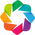

BokehModel(combine_events=True, render_bundle={'docs_json': {'e4817fb6-ba51-40f4-a43a-28afa654e5b9': {'version…

In [ ]:
import holoviews as hv
import panel as pn
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

hv.extension('bokeh')

def interactive_pssm_heatmap(
    pssms_by_tax_rank,
    consensus,
    rank='kingdom',
    phosphate_loop={9,11,12,13,14},
    catalytic={17,35}
):
    """
    Interactive PSSM heatmap explorer by taxonomic rank.

    Args:
        pssms_by_tax_rank: dict of {taxon: PSSM DataFrame}
        consensus: consensus sequence string
        rank: taxonomic rank label for y-axis
        phosphate_loop: set of positions to highlight as phosphate loop
        catalytic: set of positions to highlight as catalytic residues

    Returns:
        pn.Column Panel layout for interactive exploration
    """
    # Prepare amino acid set
    aas = set()
    for pssm in pssms_by_tax_rank.values():
        aas.update(pssm.columns)
    aas = sorted(aas)

    # Custom colormap: 0 is white, 1 is blue
    cmap = LinearSegmentedColormap.from_list("white_blue", ["white", "blue"])

    def highlight_consensus(consensus, pos):
        html = ""
        for i, aa in enumerate(consensus):
            style = "font-size:18px"
            if i == pos:
                style += ";background-color:yellow; color:black; font-weight:bold"
            if i in phosphate_loop:
                style += ";color:green; font-weight:bold"
            if i in catalytic:
                style += ";color:red; font-weight:bold"
            html += f"<span style='{style}'>{aa}</span>"
        return f"<div style='font-family:monospace; word-break:break-all'>{html}</div>"

    def plot_heatmap(position=0):
        # Build DataFrame for the selected position
        heatmap_data = []
        index = []
        for sk, pssm in pssms_by_tax_rank.items():
            row = []
            for aa in aas:
                row.append(pssm.iloc[position][aa] if aa in pssm.columns else 0)
            heatmap_data.append(row)
            index.append(sk)
        heatmap_df = pd.DataFrame(heatmap_data, columns=aas, index=index)
        tidy = heatmap_df.reset_index().melt(id_vars='index', var_name='AA', value_name='Frequency')
        heatmap = hv.HeatMap(tidy, kdims=['AA', 'index'], vdims='Frequency').opts(
            cmap=cmap,
            colorbar=True,
            clim=(0, 1),
            xrotation=0,
            yrotation=0,
            xlabel='Amino Acid',
            ylabel=rank.capitalize(),
            colorbar_opts={'title': 'Frequency'},
            tools=['hover'],
            width=800,
            height=300,
            line_color='black',
            show_grid=True,
            toolbar='above',
            labelled=['x', 'y', 'colorbar'],
            xaxis='top',
            fontsize={'xticks': 14, 'yticks': 14, 'ylabel': 14, 'xlabel': 14, 'title': 16}
        )
        return heatmap.opts(title=f"Aligned Position {position+1}")

    slider = pn.widgets.IntSlider(name='Aligned Position', start=0, end=len(consensus)-1, value=0)

    @pn.depends(slider)
    def consensus_view(position):
        return pn.pane.HTML(highlight_consensus(consensus, position), width=800)

    dmap = hv.DynamicMap(pn.bind(plot_heatmap, position=slider))

    return pn.Column(
        slider,
        dmap,
        pn.pane.Markdown("## Consensus sequence (highlighted position):"),
        consensus_view
    )

# Example usage:
panel = interactive_pssm_heatmap(pssms_by_tax_rank, consensus, rank='kingdom')
panel.servable()

In [ ]:
merged_df['superkingdom'].unique()

array(['Bacteria', 'Eukaryota', 'Archaea'], dtype=object)